# Linear Algebra for Data science

# Chapter 11

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse

In [3]:
# Fake data for courses & happiness relationship

numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

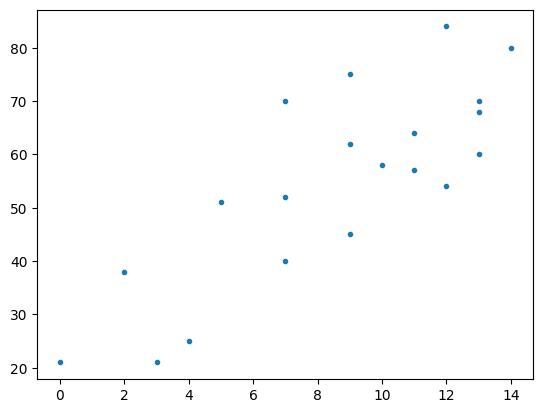

In [4]:
plt.plot(numcourses, happiness, '.')

In [5]:
X = sm.add_constant(numcourses)
Y = happiness

In [6]:
model = sm.OLS(Y,X)

In [7]:
results = model.fit()
results.params

array([23.13033815,  3.69820606])

In [8]:
np.polyfit(numcourses,happiness, deg=1)

array([ 3.69820606, 23.13033815])

In [9]:
xseq = np.linspace(0, 14, num=100)

b1, b0 = np.polyfit(numcourses,happiness, deg=1)

yseq = b0 + b1 * xseq

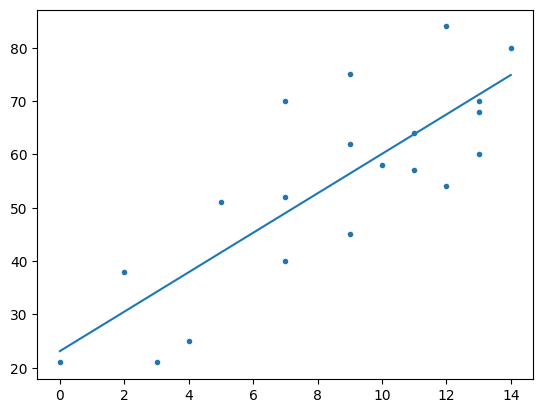

In [10]:
plt.plot(numcourses, happiness, '.')
plt.plot(xseq, yseq, 'C0')

In [11]:
[1] * 5

[1, 1, 1, 1, 1]

In [12]:
# Now let's do the same algebra-style:

A = np.array([[1]*len(numcourses), numcourses]).T
A

array([[ 1, 13],
       [ 1,  4],
       [ 1, 12],
       [ 1,  3],
       [ 1, 14],
       [ 1, 13],
       [ 1, 12],
       [ 1,  9],
       [ 1, 11],
       [ 1,  7],
       [ 1, 13],
       [ 1, 11],
       [ 1,  9],
       [ 1,  2],
       [ 1,  5],
       [ 1,  7],
       [ 1, 10],
       [ 1,  0],
       [ 1,  9],
       [ 1,  7]])

In [13]:
beta = np.linalg.inv(A.T @ A) @ A.T @ happiness
beta

array([23.13033815,  3.69820606])

## Exercise 11.1

In [14]:
b1, b0 = np.polyfit(numcourses,happiness, deg=1)

predictions = np.array([b0 + b1*x for x in numcourses])

errors = np.array([(y - (b0 + b1*x)) for x,y in zip(numcourses, happiness)])

In [15]:
rmse(happiness, predictions)

10.479180517641677

In [16]:
(((errors**2).sum() / len(happiness)))**0.5

10.479180517641677

In [17]:
errors.mean(), errors.var()

(-1.6342482922482303e-14, 109.81322432132086)

In [18]:
np.mean(errors)

-1.6342482922482303e-14

In [19]:
errors @ predictions #> 1.9698259689533206e-11
# close enough to zero

-1.9698259689533206e-11

In [20]:
np.corrcoef(errors, predictions)

array([[ 1.00000000e+00, -8.01795814e-16],
       [-8.01795814e-16,  1.00000000e+00]])

## Exercise 11.2

Prove that vector of errors is ortogonal to the subspace of matrix

In [21]:
# Illustration:

numcourses @ errors

-3.339550858072471e-12

Analytical prove

the intuition behind that is simple. If

$$ A\beta = Y + \epsilon $$

than epsilon is exactly the measure of declination of Y from the A-space, hence it would be ortogonal to it *Would it though?*

But to prove it more rigorously: (*I failed to prove that myself but found the prove there: https://math.stackexchange.com/questions/3456100/proving-that-error-vector-to-least-squares-solution-is-orthogonal-to-the-columns*)

$$A\beta = Y + \epsilon <=> \epsilon = A\beta - Y;$$

We should prove that 

$$ A^T\epsilon=0 <=> A^T(A\beta - Y) = 0 $$

Which is true beacuse

$$ A^T(A\beta - Y) = A^TA\beta - A^TY = A^TA((A^TA)^{-1}A^TY) - A^TY = (A^TA)(A^TA)^{-1}(A^TY) - A^TY = IA^TY - A^TY = \textbf{0}$$

## Exercise 11.3

In [55]:
#first, let's have a more intresting case:

a0 = 2
a1 = 2.343


x = np.random.uniform(low=0, high=100, size=50)

In [65]:
x.var()

685.5143355004352

In [77]:
y = [i * a1 + a0 + np.random.randn() * 2*x.var()**0.5 for i in x]

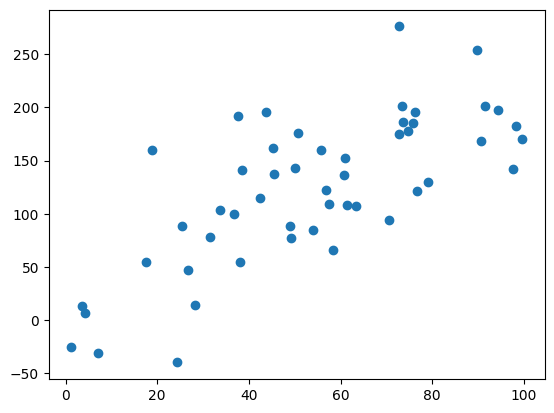

In [78]:
plt.plot(x, y, 'o')

In [80]:
# Not bad

# Let's check correlation

np.corrcoef(y,x)

array([[1.        , 0.73282208],
       [0.73282208, 1.        ]])

In [81]:
X = sm.add_constant(x)
Y = y

In [83]:
model = sm.OLS(Y, X)
result = model.fit()
result.params

array([18.18956505,  1.95225547])

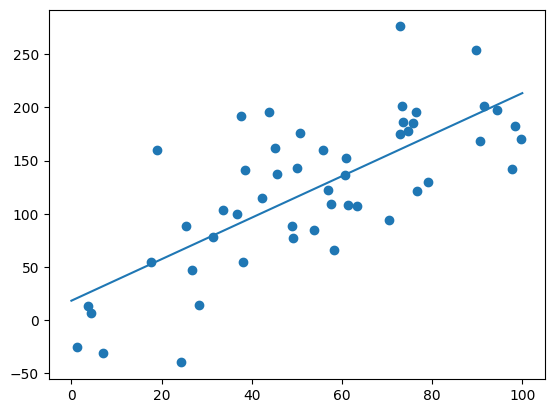

In [90]:
plt.plot(x, y, 'o')

xseq = np.linspace(0,100,100)
yseq = sm.add_constant(xseq) @ result.params
plt.plot(xseq, yseq, 'C0')